In [57]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [58]:
Epoch_array=np.arange(0,5)
H1_array=np.zeros(5) 
H2_array=np.zeros(5) 
H3_array=np.zeros(5) 
sigmaH1=np.zeros(5) 
sigmaH2=np.zeros(5)
sigmaH3=np.zeros(5)

#observation noise
obsnoise = 0.02
P=inv(np.matrix([[obsnoise*obsnoise, 0, 0, 0, 0, 0 ], [0, obsnoise*obsnoise, 0, 0, 0, 0], [0, 0, obsnoise*obsnoise, 0, 0, 0],
                 [0,0,0,obsnoise*obsnoise,0,0], [0,0,0,0,obsnoise*obsnoise,0], [0,0,0,0,0,obsnoise*obsnoise]]))

#observations
GetY=np.matrix([[4.96,4.93,5.25,-5.26,-4.96,-4.99],[4.96,4.94,5.56,-5.55,-4.89,-4.92],[4.97,4.91,5.84,-5.81,-4.91,-4.92],
              [4.86,4.83,6.09,-6.09,-4.86,-4.89],[4.85,4.81,6.33,-6.34,-4.80,-4.82]])

#first epoch ajustment
y=np.transpose(GetY[0])
A=np.matrix([[1,0,0],[-1,1,0],[0,-1,1],[0,1,-1],[1,-1,0],[-1,0,0]])
x=inv(np.transpose(A)@P@A)@np.transpose(A)@P@y
epsi=y-A@x
s02=np.asscalar(np.transpose(epsi)@P@epsi/(6-3))
Sxx=s02*inv(np.transpose(A)@P@A)

Epoch_array[0]=0
H1_array[0]=x[0]
H2_array[0]=x[1]
H3_array[0]=x[2]
sigmaH1[0]=np.sqrt(Sxx[0,0])
sigmaH2[0]=np.sqrt(Sxx[1,1])
sigmaH3[0]=np.sqrt(Sxx[2,2])


In [59]:
#further epochs adjustment
for i in np.arange(1,5):
    x_old=x
    s02_old=s02
    Sxx_old=Sxx
    A=A
    y=np.transpose(GetY[i])
    x=x_old + inv(s02_old * inv(Sxx_old) + np.transpose(A)@P@A)@np.transpose(A)@P@(y-A@x_old)
    dx=x-x_old
    epsi=y-A@x
    s02 = np.asscalar(1.0/((i+1)*6.0-3.0)*( s02_old * (i*6-3 + np.transpose(dx)@inv(Sxx_old)@dx) + np.transpose(epsi)@P@epsi))
    Sxx=s02*inv(s02_old*inv(Sxx_old) + np.transpose(A)@P@A)
    
    Epoch_array[i]=i
    H1_array[i]=x[0]
    H2_array[i]=x[1]
    H3_array[i]=x[2]
    sigmaH1[i]=np.sqrt(Sxx[0,0])
    sigmaH2[i]=np.sqrt(Sxx[1,1])
    sigmaH3[i]=np.sqrt(Sxx[2,2])




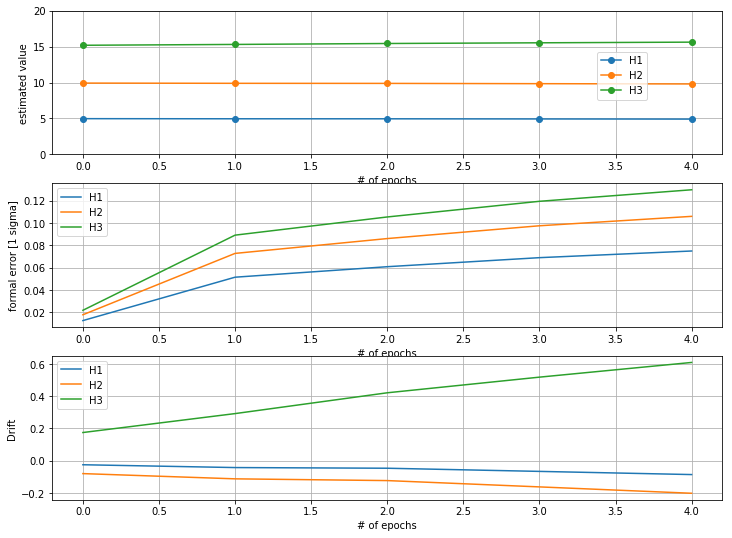

In [63]:
#plot results
plt.figure(figsize=(12, 9))
ax=plt.subplot(311) 
plt.plot(Epoch_array, H1_array,'o-',label='H1')
plt.plot(Epoch_array, H2_array,'o-',label='H2')
plt.plot(Epoch_array, H3_array,'o-',label='H3')
ax.legend(loc='upper center', bbox_to_anchor=(0.85, 0.75))
axes = plt.gca()
axes.set_ylim([0,20])
plt.grid()
plt.xlabel('# of epochs')
plt.ylabel('estimated value')

plt.subplot(312)  
plt.plot(Epoch_array, sigmaH1,label='H1')
plt.plot(Epoch_array, sigmaH2,label='H2')
plt.plot(Epoch_array, sigmaH3,label='H3')
plt.legend()
plt.grid()
plt.xlabel('# of epochs')
plt.ylabel('formal error [1 sigma]')


plt.subplot(313)  
plt.plot(Epoch_array, H1_array-5,label='H1')
plt.plot(Epoch_array, H2_array-10,label='H2')
plt.plot(Epoch_array, H3_array-15,label='H3')
plt.legend()
plt.grid()
plt.xlabel('# of epochs')
plt.ylabel('Drift')
plt.show()

